In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
import yfinance as yf
start = '2010-01-01'
end = '2022-12-31'

df = yf.download('AAPL',start,end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3272 entries, 2010-01-04 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3272 non-null   float64
 1   High       3272 non-null   float64
 2   Low        3272 non-null   float64
 3   Close      3272 non-null   float64
 4   Adj Close  3272 non-null   float64
 5   Volume     3272 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 178.9 KB


In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478999,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490199,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386963,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375158,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417540,447610800


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.127045,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.307251,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.339417,85438400
2022-12-29,127.989998,130.479996,127.730003,129.610001,128.889572,75703700
2022-12-30,128.410004,129.949997,127.430000,129.929993,129.207794,77034200


In [6]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478999,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490199,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386963,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375158,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417540,447610800


In [7]:
df = df.drop(['Date','Adj Close'], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


Text(0, 0.5, 'Closing Price')

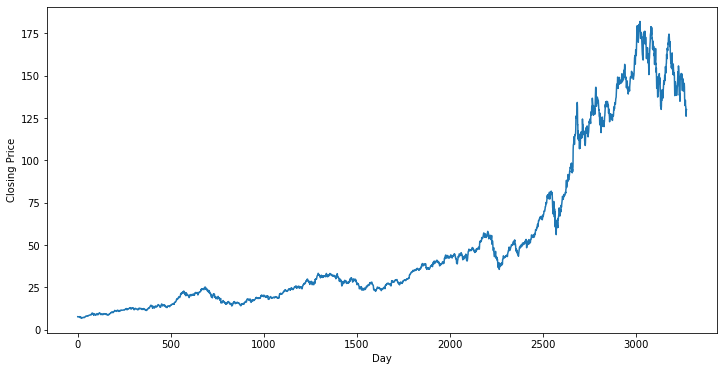

In [8]:
plt.figure(figsize = (12,6))
plt.plot(df['Close'])
plt.xlabel('Day')
plt.ylabel('Closing Price')

In [9]:
ma100 = df['Close'].rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3267    150.515600
3268    150.157800
3269    149.764699
3270    149.412100
3271    149.062199
Name: Close, Length: 3272, dtype: float64

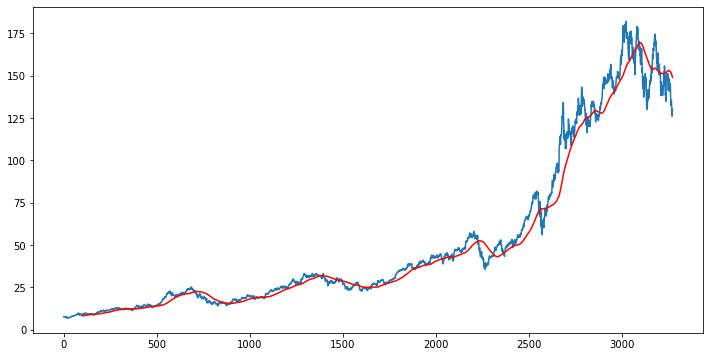

In [10]:
plt.figure(figsize = (12,6))
plt.plot(df['Close'])
plt.plot(ma100,'red')

In [11]:
ma200 = df['Close'].rolling(200).mean()
ma200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3267    152.1331
3268    152.0096
3269    151.8867
3270    151.7593
3271    151.6110
Name: Close, Length: 3272, dtype: float64

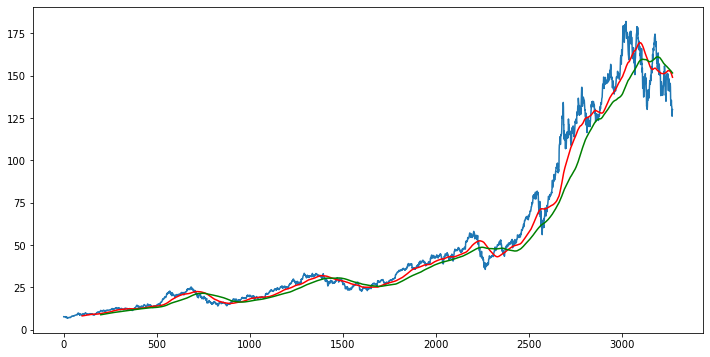

In [12]:
plt.figure(figsize = (12,6))
plt.plot(df['Close'])
plt.plot(ma100,'red')
plt.plot(ma200, 'green')

In [13]:
df.shape

(3272, 5)

In [14]:
# Splitting Data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):])

print(data_training.shape)
print(data_testing.shape)

(2290, 1)
(982, 1)


In [15]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [16]:
data_training.tail()

,Close
2285,41.630001
2286,42.812500
2287,43.544998
2288,43.560001
2289,42.735001


In [17]:
data_testing.head()

,Close
2290,42.602501
2291,42.357498
2292,42.722500
2293,42.544998
2294,42.700001


In [18]:
data_testing.tail()

,Close
3267,131.860001
3268,130.029999
3269,126.040001
3270,129.610001
3271,129.929993


In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [20]:
data_training_array = scaler.fit_transform(data_training)
data_training_array[101]

array([0.04525843])

In [21]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train ,y_train = np.array(x_train), np.array(y_train)

In [22]:
x_train.shape

(2190, 100, 1)

In [23]:
x_train

array([[[0.01533047],
        [0.01558878],
        [0.01320823],
        ...,
        [0.03819355],
        [0.03711847],
        [0.03634356]],

       [[0.01558878],
        [0.01320823],
        [0.01293595],
        ...,
        [0.03711847],
        [0.03634356],
        [0.04279409]],

       [[0.01320823],
        [0.01293595],
        [0.01391331],
        ...,
        [0.03634356],
        [0.04279409],
        [0.04525843]],

       ...,

       [[0.95983077],
        [0.94624557],
        [0.97234088],
        ...,
        [0.67928149],
        [0.67967244],
        [0.70278682]],

       [[0.94624557],
        [0.97234088],
        [0.95978186],
        ...,
        [0.67967244],
        [0.70278682],
        [0.71710501]],

       [[0.97234088],
        [0.95978186],
        [0.93065677],
        ...,
        [0.70278682],
        [0.71710501],
        [0.71739828]]])

In [24]:
y_train

array([0.04279409, 0.04525843, 0.04801596, ..., 0.71710501, 0.71739828,
       0.70127194])

In [25]:
y_train.shape

(2190,)

## ML Model

In [26]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [27]:
model = Sequential()
model.add(LSTM(units = 50, activation='relu', return_sequences=True,
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [29]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=40)

Epoch 1/40
69/69 [==============================] - 13s 123ms/step - loss: 0.0324
Epoch 2/40
69/69 [==============================] - 8s 122ms/step - loss: 0.0066
Epoch 3/40
69/69 [==============================] - 8s 122ms/step - loss: 0.0067
Epoch 4/40
69/69 [==============================] - 8s 122ms/step - loss: 0.0054
Epoch 5/40
69/69 [==============================] - 8s 123ms/step - loss: 0.0047
Epoch 6/40
69/69 [==============================] - 9s 124ms/step - loss: 0.0049
Epoch 7/40
69/69 [==============================] - 8s 122ms/step - loss: 0.0045
Epoch 8/40
69/69 [==============================] - 8s 121ms/step - loss: 0.0047
Epoch 9/40
69/69 [==============================] - 8s 123ms/step - loss: 0.0039
Epoch 10/40
69/69 [==============================] - 8s 123ms/step - loss: 0.0036
Epoch 11/40
69/69 [==============================] - 8s 122ms/step - loss: 0.0037
Epoch 12/40
69/69 [==============================] - 8s 122ms/step - loss: 0.0035
Epoch 13/40
69/69 [=====

In [30]:
model.save('keras_model.h5')

In [31]:
data_testing.head()

,Close
2290,42.602501
2291,42.357498
2292,42.722500
2293,42.544998
2294,42.700001


In [32]:
data_training.tail(100)

,Close
2190,55.959999
2191,54.470001
2192,54.560001
2193,54.592499
2194,55.007500
...,...
2285,41.630001
2286,42.812500
2287,43.544998
2288,43.560001


In [33]:
past_100_days = data_training.tail(100)

In [34]:
final_df = past_100_days.append(data_testing, ignore_index=True)

C:\Users\ANKIT SINGH\AppData\Local\Temp\ipykernel_13284\531349220.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


In [35]:
final_df.head()

,Close
0,55.959999
1,54.470001
2,54.560001
3,54.592499
4,55.007500


In [36]:
input_data = scaler.fit_transform(final_df)

In [37]:
input_data

array([[0.13937014],
       [0.1291969 ],
       [0.1298114 ],
       ...,
       [0.61785443],
       [0.64222927],
       [0.64441407]])

In [38]:
input_data.shape

(1082, 1)

In [39]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [40]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(982, 100, 1)
(982,)


In [41]:
## Making Predictions

y_predicted = model.predict(x_test)

31/31 [==============================] - 2s 34ms/step


In [42]:
y_predicted.shape

(982, 1)

In [43]:
y_test

array([0.04816933, 0.04649653, 0.04898865, 0.04777672, 0.04883503,
       0.04818639, 0.04905691, 0.05093454, 0.04927882, 0.05253905,
       0.05468976, 0.05486046, 0.05578219, 0.05284628, 0.05595289,
       0.05745499, 0.05690876, 0.05518478, 0.05173679, 0.05243663,
       0.06266108, 0.06609201, 0.06745755, 0.07090551, 0.07498506,
       0.07822822, 0.0756849 , 0.07846719, 0.09029614, 0.08340019,
       0.07945721, 0.07612869, 0.07899633, 0.07942306, 0.08152257,
       0.08372451, 0.08846975, 0.09073996, 0.09132031, 0.09355637,
       0.09884784, 0.09782367, 0.09973542, 0.09688486, 0.09674831,
       0.0973628 , 0.09739694, 0.10401981, 0.10526585, 0.10640949,
       0.1114449 , 0.1108987 , 0.10768968, 0.1060169 , 0.10654605,
       0.09982077, 0.11663396, 0.11429546, 0.11873346, 0.11315182,
       0.10355893, 0.1036272 , 0.09990612, 0.0938636 , 0.0743023 ,
       0.07932065, 0.08317828, 0.08174448, 0.079901  , 0.06981308,
       0.0758044 , 0.06928394, 0.06395836, 0.06278058, 0.06151

In [44]:
y_predicted

array([[0.11296923],
       [0.11405613],
       [0.11522715],
       [0.11644045],
       [0.11765574],
       [0.11883876],
       [0.11996092],
       [0.12100211],
       [0.1219539 ],
       [0.12281109],
       [0.12357928],
       [0.12427109],
       [0.12490305],
       [0.12549277],
       [0.12604758],
       [0.12657656],
       [0.12709102],
       [0.1275977 ],
       [0.12809533],
       [0.12857099],
       [0.12901159],
       [0.12943086],
       [0.12985572],
       [0.13031286],
       [0.13082896],
       [0.13143112],
       [0.13214305],
       [0.13296959],
       [0.13390777],
       [0.13496585],
       [0.13613631],
       [0.13739096],
       [0.13868539],
       [0.13997974],
       [0.1412401 ],
       [0.14244336],
       [0.14357863],
       [0.14465249],
       [0.14568073],
       [0.14667952],
       [0.14766628],
       [0.14866689],
       [0.14969867],
       [0.15077378],
       [0.15188724],
       [0.15302467],
       [0.15416844],
       [0.155

In [45]:
scaler.scale_

array([0.00682769])

In [46]:
scale_factor = 1/0.00682769
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

In [47]:
print(y_predicted.shape)
print(y_test.shape)

(982, 1)
(982,)


In [48]:
y_test = y_test.reshape(982,1)
y_ptedicted = y_predicted.reshape(982,1)

In [49]:
import pandas as pd

# Assuming y_test and y_predicted are arrays or Series
y_test = y_test.flatten() if isinstance(y_test, (pd.Series, np.ndarray)) else y_test
y_predicted = y_predicted.flatten() if isinstance(y_predicted, (pd.Series, np.ndarray)) else y_predicted

# Create the DataFrame
dfr = pd.DataFrame({'Close': y_test, 'Predictions': y_predicted})

In [50]:
print(dfr)

         Close  Predictions
0     7.054997    16.545748
1     6.809994    16.704935
2     7.174996    16.876446
3     6.997494    17.054150
4     7.152497    17.232143
..         ...          ...
977  96.312451   106.123764
978  94.482450   104.890892
979  90.492455   103.653534
980  94.062453   102.395294
981  94.382444   101.161285

[982 rows x 2 columns]


In [51]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predicted)

0.973934233270353

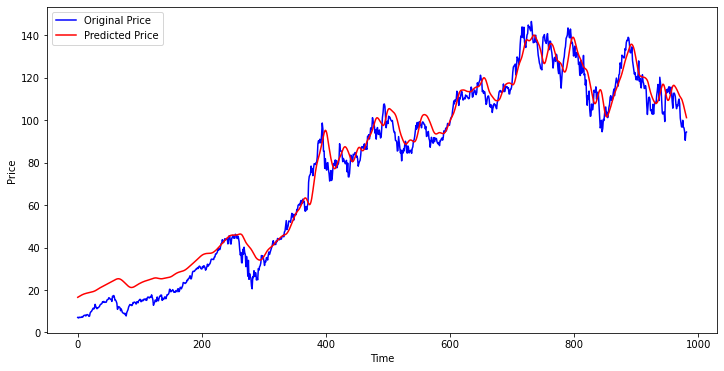

In [52]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()